# Gamma BR

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def BR(rv,y_ub=50) :
    """
    Using optimize.minimize, it returns the best response function against the NON-NEGATIVE random variable rv :
    v \mapsto argmax_b (v-b)G(b)
    where G is the cdf of rv
    """
    if(rv.support()[1]!=np.inf) :
        y_ub = rv.support()[1]
    
    def br(v) :
        minus_utility_v = lambda b : -(v-b)*rv.cdf(b)
        return optimize.minimize_scalar(minus_utility_v,method="bounded",bounds=(rv.support()[0],y_ub)).x
    return br

In [3]:
def iBR(rv) :
    return lambda y : optimize.root_scalar(lambda v : BR(rv)(v)-y,x0=0, x1=y).root

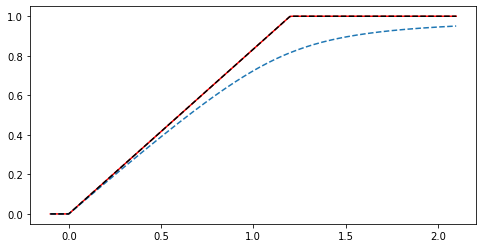

In [50]:
n=5 #number of opponents
Y1 = stats.beta(a=n,b=1)
Y2 = stats.beta(a=n-1,b=2)
x_ = np.linspace(-0.1,2.1,201)

plt.figure(figsize=(8,4))
plt.plot(x_,np.maximum(np.minimum(n/(n+1)*x_,1),0),'r')
plt.plot(x_,[BR(Y2)(x) for x in x_],'--')
plt.plot(x_,[BR(Y1)(x) for x in x_],'k--')
plt.show()

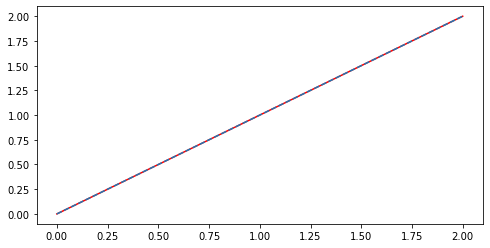

5.6346038945775945e-12


In [54]:
x_ = np.linspace(0,2,201)

plt.figure(figsize=(8,4))
plt.plot(x_,x_,'r')
y_=[iBR(Y2)(BR(Y2)(x)) for x in x_]
plt.plot(x_,y_,'--')
plt.show()
print(np.linalg.norm(y_-x_,np.inf))

In [208]:
a_ = np.linspace(0,4,100)
b_ = np.linspace(0,3,100)

y_ = []

for b in b_ :
    y_.append([])
    for a in a_ :
        rv = stats.beta(a,b,scale=1)
        y_[-1].append(BR(rv)(1)-rv.mean())
y_ = np.array(y_)

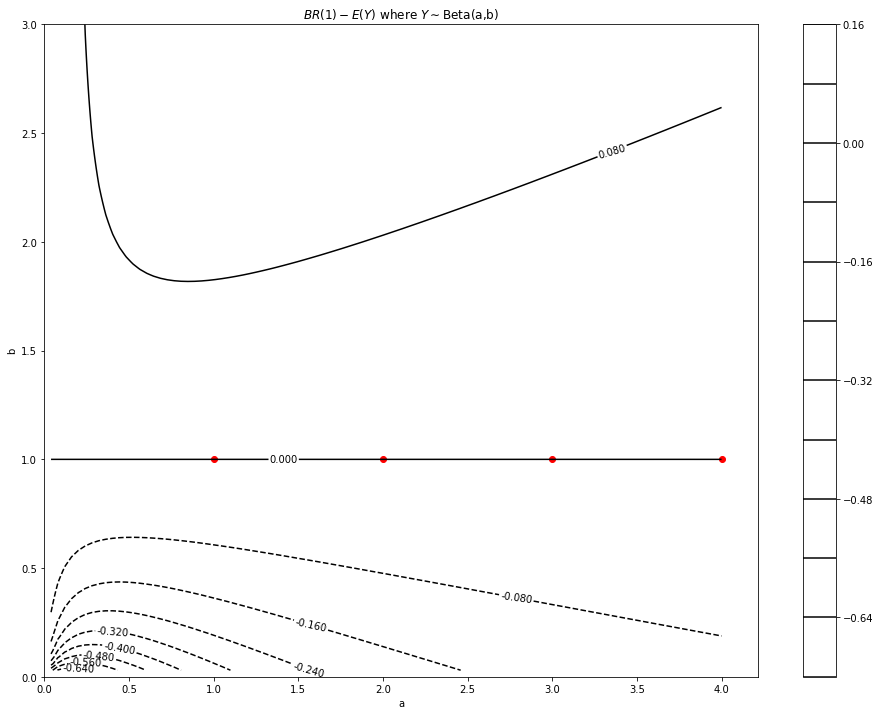

In [215]:
X,Y = np.meshgrid(a_,b_)

fig, ax = plt.subplots(1,1,figsize=(16,12))
cp = ax.contour(X, Y, y_,10,colors='k',)

ax.clabel(cp, inline=1, fontsize=10)

fig.colorbar(cp)
ax.set_xlabel('a')
ax.set_ylabel('b')
plt.scatter(np.arange(1,5),np.ones(4),color='r')
ax.set_title(r"$BR(1)-E(Y)$ where $Y\sim$Beta(a,b)")
plt.show()